In [42]:
%matplotlib inline
#import sys
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#df = pd.read_csv(sys.argv[1])
#transFeeRate= float(sys.argv[2])
df = pd.read_csv("SPY.csv")

priceVec = df["Adj Close"].values

In [43]:
def myOptimAction(priceVec, transFeeRate):
    import numpy as np
    dataLen = len(priceVec)
    actionVec = np.zeros(dataLen)
    
    ic=dataLen-1
    actionVec[ic] = -1
    for ie in range(dataLen-1,-1,-1):
        if actionVec[ic]==1:
            if priceVec[ie]<priceVec[ic]:
                actionVec[ie]=1
                
                ic=ie

            elif priceVec[ie]*(1-transFeeRate)**2>priceVec[ic]:
                actionVec[ie]=-1
                
                ic=ie

        elif actionVec[ic]==-1:
            if priceVec[ie]/(1-transFeeRate)**2<priceVec[ic]:
                actionVec[ie]=1
                
                ic=ie
  
            elif priceVec[ie]>priceVec[ic]:
                actionVec[ie]=-1
        
                ic=ie

    actionVec[ic] = 0
     
    return actionVec


In [44]:
def profitEstimateOpen(priceVec, transFeeRate, actionVec):
    import numpy as np
    
    capital=1
    capitalOrig=capital
    dataCount=len(priceVec)
    suggestedAction=actionVec
    stockHolding=np.zeros((dataCount,1))
    total = np.zeros((dataCount,1))
    realAction=np.zeros((dataCount,1))
    total[0] = capital
    for ic in range(dataCount):
        currPrice = priceVec[ic]
        if ic > 0:
            stockHolding[ic]=stockHolding[ic-1]
        if suggestedAction[ic] == 1:
            if stockHolding[ic]==0:            
                stockHolding[ic]=capital*(1-transFeeRate)/currPrice
                capital=0
                realAction[ic]=1
        elif suggestedAction[ic] == -1:
            if stockHolding[ic]>0:
                capital=stockHolding[ic]*currPrice*(1-transFeeRate)
                stockHolding[ic]=0
                realAction[ic]=-1
        elif suggestedAction[ic] == 0:
            realAction[ic]=0
        else:
            assert False
        total[ic]=capital+stockHolding[ic]*currPrice*(1-transFeeRate)
    returnRate=(total[-1]-capitalOrig)/capitalOrig
    return returnRate


手續費是 1% 的時候的最佳操作

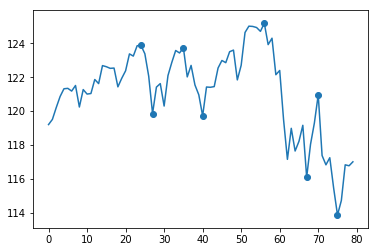

In [45]:
transFeeRate= float(0.01)
actionVec = myOptimAction(priceVec, transFeeRate)

i= 0
while actionVec[i]==0:
    i = i + 1
s = actionVec[i]  
i = i+1  
while i<len(actionVec):
    if actionVec[i] == s:
        actionVec[i] = 0
    elif (s * actionVec[i]) == -1:
        s = actionVec[i]
    i = i + 1 
    
cutLength = 160
cutLength0 = 80
actionVec = actionVec[cutLength0:cutLength]
priceVec = priceVec[cutLength0:cutLength]

ind = np.where(actionVec!=0)[0]
ind2 = priceVec[actionVec!=0]

tPoint = np.concatenate((ind[:,None], ind2[:,None]), axis=1)
plt.plot(priceVec[:])
plt.scatter(tPoint[:,0],tPoint[:,1])

手續費是0%的時候的最佳操作

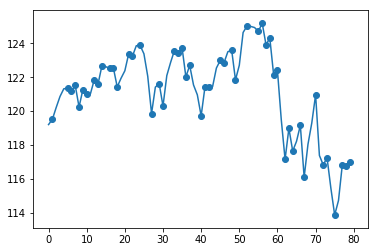

In [47]:
transFeeRate= float(0)
actionVec = myOptimAction(priceVec, transFeeRate)

i= 0
while actionVec[i]==0:
    i = i + 1
s = actionVec[i]  
i = i+1  
while i<len(actionVec):
    if actionVec[i] == s:
        actionVec[i] = 0
    elif (s * actionVec[i]) == -1:
        s = actionVec[i]
    i = i + 1 
    
ind = np.where(actionVec!=0)[0]
ind2 = priceVec[actionVec!=0]

tPoint = np.concatenate((ind[:,None], ind2[:,None]), axis=1)
plt.plot(priceVec[:])
plt.scatter(tPoint[:,0],tPoint[:,1])

In [27]:
returnRate = profitEstimateOpen(priceVec, transFeeRate, actionVec)
print(returnRate[0])

212.08324354543407
